In [93]:
import json
import numpy as np

In [17]:
data = json.load(open('raw_data/all_train.json',encoding='utf-8'))


['Hotel Satisfaction',
 'Music Concert Attendance',
 'Company Bankruptcy Prediction',
 'Customer Churn Modelling',
 'Concrete Strength Classification',
 'Car Acceptability Valuation',
 'Student Job Placement',
 'Used Cars Price-Range Prediction',
 'Student Job Placement',
 'Concrete Strength Classification',
 'Student Job Placement',
 'Tic-Tac-Toe Strategy',
 'House Price Classification',
 'Advertisement Prediction',
 'Music Concert Attendance',
 'Mobile Price-Range Classification',
 'Cab Surge Pricing System',
 'Advertisement Prediction',
 'Flight Price-Range Classification',
 'Water Quality Classification',
 'Employee Attrition',
 'Company Bankruptcy Prediction',
 'House Price Classification',
 'E-Commerce Shipping',
 'Printer Sales',
 'Hotel Satisfaction',
 'Vehicle Insurance Claims',
 'Real Estate Investment',
 'Vehicle Insurance Claims',
 'Insurance Churn',
 'Student Job Placement',
 'Vehicle Insurance Claims',
 'Insurance Churn',
 'Credit Card Fraud Classification',
 'Tic-Tac-Toe

In [76]:
data[0].keys()

dict_keys(['model_name', 'deleted', 'mturk_id', 'predicted_class', 'narrative_status', 'predicted_class_label', 'date_submitted', 'id', 'feature_division', 'date_approved', 'test_instance', 'features_placeholder', 'is_paid', 'task_name', 'prediction_confidence', 'redeem_code', 'narrator', 'narration', 'user_ip', 'narrative_question', 'prediction_confidence_level'])

In [19]:
[i.get('task_name', None) for i in data]

530

In [99]:
from collections import Counter
count = Counter([i.get('task_name', None) for i in data])
(count.values())

dict_values([9, 4, 11, 9, 12, 6, 12, 15, 11, 12, 14, 14, 15, 22, 6, 14, 9, 15, 11, 8, 7, 8, 13, 13, 12, 9, 12, 11, 10, 5, 7, 11, 12, 10, 8, 13, 8, 11, 7, 5, 109])

In [95]:
count = Counter([i.get('model_name', None) for i in data])
(count.most_common())
count.values()

dict_values([85, 72, 4, 10, 21, 34, 4, 37, 6, 50, 20, 3, 13, 33, 6, 11, 1, 5, 4, 2, 109])

In [101]:
no_task = [x for x in data if x.get('narrative_question', None) == None]

In [105]:
len(no_task)

109

In [31]:
json.dump(no_task, open('no_task.json', 'w', encoding='utf-8'), ensure_ascii=False)

In [59]:
set([', '.join(sorted(list(task.keys()))) for task in data])

{'date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
 'date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
 'feature_division, narration, narration3, predicted_class, prediction_confidence_level',
 'feature_division, narration, predicted_class, prediction_confidence_level'}

There is only one instance of narration3. I think this must have been an instance where there was 2 narrations for one thing

In [106]:
Counter([', '.join(sorted(list(task.keys()))) for task in no_task]).most_common()

[('feature_division, narration, predicted_class, prediction_confidence_level',
  108),
 ('feature_division, narration, narration3, predicted_class, prediction_confidence_level',
  1)]

In [43]:
min([(len(d['prediction_confidence_level'].split(','))) for d in no_task])

3

In [44]:
task = [x for x in data if x.get('task_name', None) != None]

In [46]:
max([(len(d['prediction_confidence_level'].split(','))) for d in task])

4

In [107]:
no_task[0]

{'predicted_class': 'C3',
 'prediction_confidence_level': 'C1:40.36%, C2:10.15%, C3:49.49%',
 'feature_division': {'ranks': [['F14', 0],
   ['F8', 1],
   ['F15', 2],
   ['F28', 3],
   ['F2', 4],
   ['F36', 5],
   ['F30', 6],
   ['F9', 7],
   ['F26', 8],
   ['F3', 9],
   ['F18', 10],
   ['F13', 11],
   ['F35', 12],
   ['F33', 13],
   ['F32', 14],
   ['F34', 15],
   ['F38', 16],
   ['F42', 17],
   ['F23', 18],
   ['F43', 19],
   ['F12', 20],
   ['F31', 21],
   ['F4', 22],
   ['F24', 23],
   ['F5', 24],
   ['F39', 25],
   ['F21', 26],
   ['F22', 27],
   ['F37', 28],
   ['F20', 29],
   ['F16', 30],
   ['F25', 31],
   ['F40', 32],
   ['F11', 33],
   ['F10', 34],
   ['F41', 35],
   ['F17', 36],
   ['F29', 37],
   ['F6', 38],
   ['F1', 39],
   ['F7', 40],
   ['F19', 41],
   ['F27', 42]],
  'contradict': ['F8',
   'F28',
   'F2',
   'F36',
   'F30',
   'F3',
   'F18',
   'F13',
   'F32',
   'F34',
   'F38',
   'F43',
   'F12',
   'F31',
   'F4',
   'F24',
   'F22',
   'F16',
   'F25'],
  'supp

In [121]:
test = json.load(open('raw_data/test_set_new.json',encoding='utf-8'))
len(test)

48

In [67]:
Counter([', '.join(sorted(list(task.keys()))) for task in test]).most_common()

[('date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
  24),
 ('date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
  24)]

In [73]:
count = Counter([i.get('task_name', None) for i in test])
len(count.most_common())

31

In [108]:
all = json.load(open('raw_data/all.json',encoding='utf-8'))

In [123]:
test = [x['model_name']+x['task_name'] for x in all if x.get('test_instance', None) != None]
train = [x['model_name']+x['task_name'] for x in all if x.get('test_instance', None) == None]

In [118]:
Counter(test).most_common()

[('LogisticRegressionUsed Cars Price-Range Prediction', 9),
 ('LogisticRegressionFlight Price-Range Classification', 9),
 ('BernoulliNBPersonal Loan Modelling', 8),
 ('SGDClassifierHouse Price Classification', 8),
 ('RandomForestClassifierFlight Price-Range Classification', 7),
 ('RandomForestClassifierCompany Bankruptcy Prediction', 6),
 ('RandomForestClassifierStudent Job Placement', 6),
 ('SVM_polyMobile Price-Range Classification', 6),
 ('DecisionTreeClassifierInsurance Churn', 6),
 ('GradientBoostingClassifierBasketball Players Career Length Prediction', 6),
 ('SVMClassifier_polyEmployee Attrition', 6),
 ('SVM_linearEmployee Promotion Prediction', 6),
 ('KNeighborsClassifierCredit Risk Classification', 6),
 ('RandomForestClassifierMobile Price-Range Classification', 6),
 ('LogisticRegressionAirline Passenger Satisfaction', 6),
 ('GradientBoostingClassifierParis House Classification', 6),
 ('KNeighborsClassifierCab Surge Pricing System', 6),
 ('RandomForestClassifierPrinter Sales',

In [120]:
len(test)

469

## Number of Features

In [8]:
from datasets import load_dataset
import matplotlib.pyplot as plt

In [4]:
train = load_dataset("james-burton/textual-explanations", split='train')

Using custom data configuration james-burton--textual-explanations-19ff8605823ae74a
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


[]

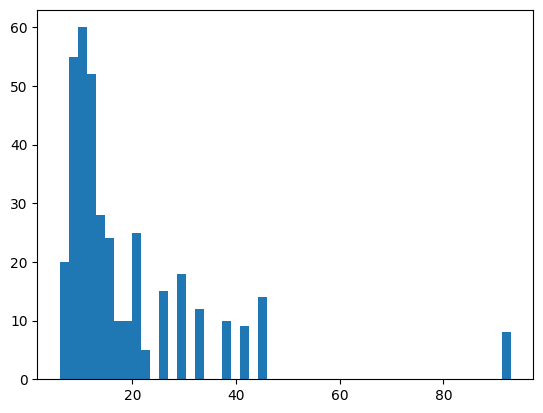

In [11]:
plt.hist([len(fs) for fs in  train['feature_nums']], bins=50)
plt.plot()

In [12]:
sorted([len(fs) for fs in  train['feature_nums']])

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
